In [1]:
cd ../src

/home/richard/Desktop/software/upload/epicluster-results/src


In [2]:
import numpy as np
import datetime
import random
import pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
sigmas = [0.9, 0.5, 0.0]
thetas = [1e-4, 1e-1, 10]

# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
cases = pandas.read_csv('../data/covid/HK.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=0.2,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


In [5]:

results = []
values = []
for sigma in sigmas:
    for theta in thetas:
        # run change point
        p = ec.PoissonModel(copy.deepcopy(inf_cases), w, imported_cases=imp_cases, epsilon=0.2, hyper_sigma=sigma, hyper_theta=theta)
        mcmc = ec.MCMCSampler(p, 4)
        phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.05, progress=True)

        results.append([phi_chain, z_chain])
        values.append((sigma, theta))



Iter=50, Rhat=31.34015716683105
Iter=100, Rhat=24.6616421474036
Iter=150, Rhat=18.687692640548917
Iter=200, Rhat=16.203101833009256
Iter=250, Rhat=15.300874770683226
Iter=300, Rhat=11.054679359099874
Iter=350, Rhat=8.403315644999958
Iter=400, Rhat=7.942094291426938
Iter=450, Rhat=5.5030585699505
Iter=500, Rhat=5.5901499441812845
Iter=550, Rhat=6.560406969354745
Iter=600, Rhat=6.216339728605822
Iter=650, Rhat=5.109233951331328
Iter=700, Rhat=4.843758637316459
Iter=750, Rhat=5.275471267632387
Iter=800, Rhat=5.347847284256315
Iter=850, Rhat=4.0466096062978085
Iter=900, Rhat=3.2084291101871063
Iter=950, Rhat=2.8449638964955573
Iter=1000, Rhat=2.7682510221354115
Iter=1050, Rhat=2.473898525373478
Iter=1100, Rhat=2.2028744091191954
Iter=1150, Rhat=2.0349073217698317
Iter=1200, Rhat=2.118265129550158
Iter=1250, Rhat=2.1136238843086734
Iter=1300, Rhat=1.9990509193637676
Iter=1350, Rhat=1.9376083224646288
Iter=1400, Rhat=1.8060210583399703
Iter=1450, Rhat=1.6815846888216897
Iter=1500, Rhat=1.589

Iter=2000, Rhat=1.5080329424761107
Iter=2050, Rhat=1.547774494412091
Iter=2100, Rhat=1.6177514453090727
Iter=2150, Rhat=1.70134952925803
Iter=2200, Rhat=1.7781723387909254
Iter=2250, Rhat=1.8310994330501438
Iter=2300, Rhat=1.9163031576781322
Iter=2350, Rhat=1.9961083941795295
Iter=2400, Rhat=2.0086137812063822
Iter=2450, Rhat=1.9301689895594099
Iter=2500, Rhat=1.794523380069895
Iter=2550, Rhat=1.6474582400941422
Iter=2600, Rhat=1.5387207590342726
Iter=2650, Rhat=1.4791533331737226
Iter=2700, Rhat=1.4685248957781896
Iter=2750, Rhat=1.477276285417345
Iter=2800, Rhat=1.5120518409929855
Iter=2850, Rhat=1.5521133801267564
Iter=2900, Rhat=1.6037390463169523
Iter=2950, Rhat=1.6227288083669598
Iter=3000, Rhat=1.6389032995035544
Iter=3050, Rhat=1.6185642214481903
Iter=3100, Rhat=1.657535583160677
Iter=3150, Rhat=1.6778154620631942
Iter=3200, Rhat=1.6569000376246554
Iter=3250, Rhat=1.6105734160277716
Iter=3300, Rhat=1.5626460712029857
Iter=3350, Rhat=1.525888677023248
Iter=3400, Rhat=1.477763982

Iter=600, Rhat=1.8726323034832306
Iter=650, Rhat=1.9273891836909187
Iter=700, Rhat=1.6841021925282662
Iter=750, Rhat=1.4643076961376158
Iter=800, Rhat=1.33351105699746
Iter=850, Rhat=1.2251746740216076
Iter=900, Rhat=1.2613036567709972
Iter=950, Rhat=1.278055571238837
Iter=1000, Rhat=1.5211308845848128
Iter=1050, Rhat=1.3898018109733545
Iter=1100, Rhat=1.2693809117421742
Iter=1150, Rhat=1.1389443507759334
Iter=1200, Rhat=1.1132212880503034
Iter=1250, Rhat=1.1287849801819094
Iter=1300, Rhat=1.1889408308202003
Iter=1350, Rhat=1.2141106691811319
Iter=1400, Rhat=1.1227973763875259
Iter=1450, Rhat=1.1078061823712892
Iter=1500, Rhat=1.112112826726772
Iter=1550, Rhat=1.072623649314828
Iter=1600, Rhat=1.0586406948594158
Iter=1650, Rhat=1.0637282067624403
Iter=1700, Rhat=1.1120915619285139
Iter=1750, Rhat=1.1583015903442788
Iter=1800, Rhat=1.1664886688190237
Iter=1850, Rhat=1.1758082389634705
Iter=1900, Rhat=1.1647060320377403
Iter=1950, Rhat=1.1524011420580895
Iter=2000, Rhat=1.147261810344185

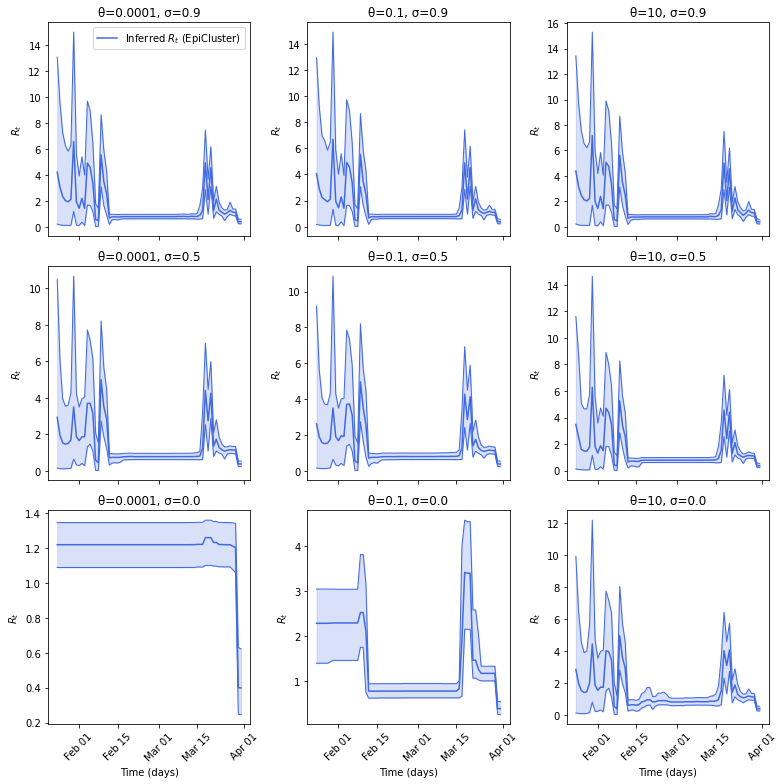

In [6]:
fig = plt.figure(figsize=(11,11))

num_exps = len(thetas) * len(sigmas)

for i in range(num_exps):
    date0 = (2020, 1, 23)
    x = np.arange(len(cases))
    x_dates = [datetime.datetime(*date0)]
    for xi in x[1:]:
        x_dates.append(x_dates[0] + datetime.timedelta(int(xi)))
    x = x_dates
    
    
    phi_chain, z_chain = results[i]
    
    ax = fig.add_subplot(len(thetas), len(sigmas), 1+i)

    sd = 1
    
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//2:], z_chain[num_mcmc//2:]):
        Rs.append([phi[zi] for zi in z][sd:])
        
    ax.plot(x[sd:], np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x[sd:], np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x[sd:], np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x[sd:], np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    if i == 0:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    ax.set_title('θ={}, σ={}'.format(values[i][1], values[i][0]))

    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    plt.xticks(rotation=45, ha='center')
    fig.autofmt_xdate(rotation=45, ha='center')
    
fig.set_tight_layout(True)


plt.savefig('../notebooks/FigureS6.pdf')
plt.show()
